
# Project: Investigate a Dataset - [No Show Appointments ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Question(s) for Analysis
1- What is the ratio between those who showed up and those who did not?

2- Does Age affeect the attendance?

3- Does Hipertension and age affect on the attendance?

4- Does Diabetes and age affect on the attendance?

5- What is the ratio between Male and Female?

6- What is the gender of the people who showed up at the appointed time?

7- What is the gender of the people who not showed up at the appointed time?

8- What is the day when the largest number of people attended?

9- What are The ratio between the SMS_received and the people who attended?

10- What are The ratio between the SMS_received and the people who absent?

11- What is the ratio between the neighborhood that achieved the largest attendance rate and the one who did not attend?


In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and proposed questions for the analysis we will be keeping only relevant data deleting the unused data so that we can make our calculation easy and understandable.


In [3]:
# Load data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#print the 5 rows in the dataframe to learning the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

dataset consist of 110527 rows and 14 column

In [5]:
#check if there is any duplicate values
boolean = df.duplicated().any()
print(boolean)

False


there is no dublicated in rows

In [6]:
#cheek the information of data like missing data ,nan values etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing values

In [7]:
#check types of data
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37.088874 , max age is 115.000000 and min age is -1.000000

mean SMS_received is 110527.000000 , max SMS_received is 1.000000


In [9]:
#rename No_show coulmn
df.rename(columns={'No-show':'No_show'},inplace=True)

rename No_show coulmn

In [10]:
#number of NOshowed patient
Noshow=(df.No_show =='Yes')
df[Noshow].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

In [11]:
#number of showed patient
Show=(df.No_show=='No')
df[Show].count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

In [12]:
# the count of people who age is 0
Age_Zero = df[df.Age == 0]
Age_Zero.count()

PatientId         3539
AppointmentID     3539
Gender            3539
ScheduledDay      3539
AppointmentDay    3539
Age               3539
Neighbourhood     3539
Scholarship       3539
Hipertension      3539
Diabetes          3539
Alcoholism        3539
Handcap           3539
SMS_received      3539
No_show           3539
dtype: int64

In [13]:
# the count of people who age is less than 0
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


identify rows with age less than 0


### Data Cleaning

1- Remove the age value that less than 0

2- Changing the AppointmentDay column into standard date format

3- Drop unnecessary columns


In [14]:
#remove the age value that less than 0
#drop row by index
df.drop(index=99832,inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
#Changing the AppointmentDay column into standard date format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(4)
memory usage: 12.6+ MB


In [16]:
#drop unnecessary columns
del_col=[ 'PatientId', 'AppointmentID', 'ScheduledDay']
df= df.drop(del_col,1)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What is the ratio between those who showed up and those who did not?)


Number of people who attended: 110526
The number of those who did not attend: 22319


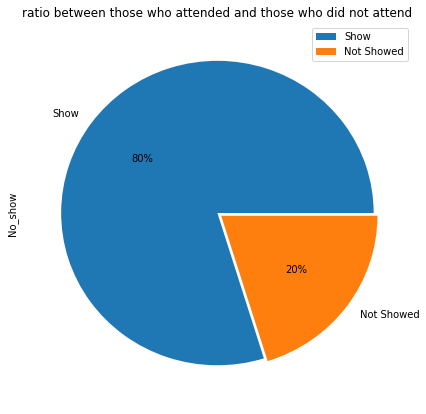

In [17]:
df["No_show"].value_counts().plot(kind="pie",labels=["Show","Not Showed"], explode=(0, .03),autopct='%2.0f%%',figsize=(7,7))
plt.title("ratio between those who attended and those who did not attend");
plt.legend();
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df['show']=show
df['noshow']=noshow
print('Number of people who attended:',df['show'].count())
print('The number of those who did not attend:',df['noshow'].sum())


Just over 20% of all appointments resulted in no shows, and 80% shows

### Research Question 2  (Does Age affeect the attendance?)

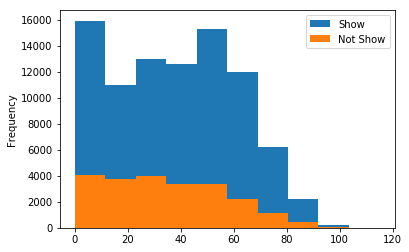

attend in Appointments Mean Age: 37.790504154999034
Missed the Appointments Mean Age: 34.31766656212196


In [18]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df[show].Age.plot.hist()
df[noshow].Age.plot.hist()
plt.legend(['Show', 'Not Show'])
plt.show()
print('attend in Appointments Mean Age:',df[show].Age.mean())
print('Missed the Appointments Mean Age:',df[noshow].Age.mean())


The people committed to attending are young people, their age ranges between 0 to 10 years, and then the percentage starts to decrease.
Then it increases in age from 50 to 60 then starts to decrease again

### Research Question 3 (Does Hipertension and age affect on the attendance?)

In [19]:
def label(x,y, t):
    plt.legend()
    plt.xlabel (x) 
    plt.ylabel (y) 
    plt.title(t)
    plt.show


The number of sick people who attend and who did not attend:
Hipertension
0    88725
1    21801
Name: show, dtype: int64


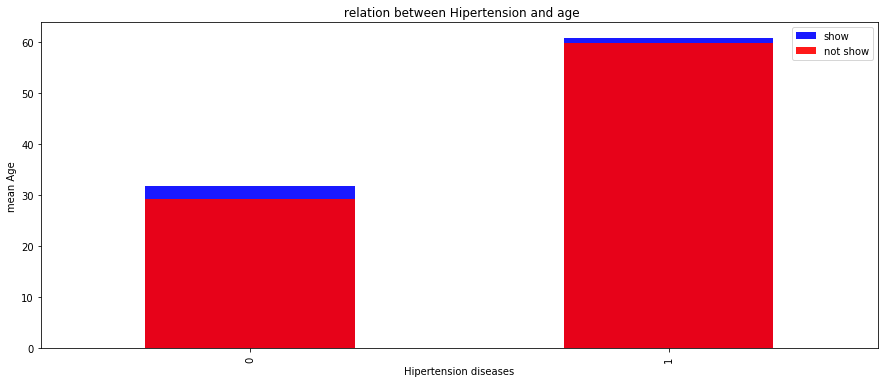

In [20]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df['show']=show
df['noshow']=noshow
df[show].groupby ('Hipertension').mean()['Age'].plot(color='blue',kind='bar', alpha= 0.9, figsize=(15, 6), label='show')
df[noshow].groupby ( 'Hipertension' ).mean()['Age'].plot(color='red',kind='bar', alpha= 0.9, figsize=(15, 6), label='not show')
label("Hipertension diseases","mean Age"," relation between Hipertension and age")
print('The number of sick people who attend and who did not attend:')
print(df.groupby('Hipertension')['show'].count())

Hipertension disease not effect on attendance

### Research Question 4 (Does Diabetes and age affect on the attendance?)

The number of sick people who attend and who did not attend:
Diabetes
0    102583
1      7943
Name: show, dtype: int64


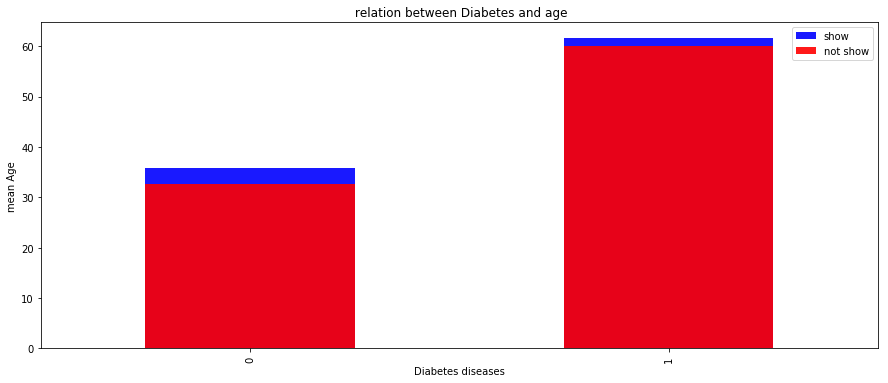

In [21]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df['show']=show
df['noshow']=noshow
df[show].groupby ('Diabetes').mean()['Age'].plot(color='blue',kind='bar', alpha= 0.9, figsize=(15, 6), label='show')
df[noshow].groupby ( 'Diabetes' ).mean()['Age'].plot(color='red',kind='bar', alpha= 0.9, figsize=(15, 6), label='not show')
label("Diabetes diseases","mean Age"," relation between Diabetes and age")
print('The number of sick people who attend and who did not attend:')
print(df.groupby('Diabetes')['show'].count())

Diabest disease not effect on attendance

### Research Question 5 (What is the ratio between Male and Female?)

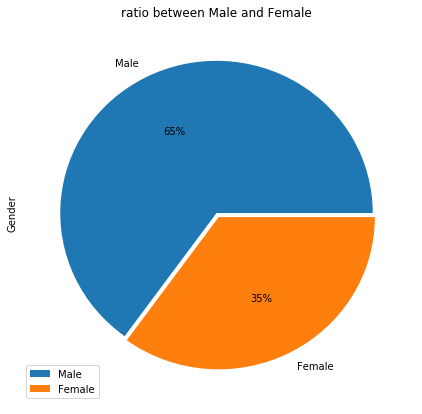

In [22]:

df["Gender"].value_counts().plot(kind="pie",labels=["Male","Female"], explode=(0, .03),autopct='%1.0f%%',figsize=(7,7))
plt.title("ratio between Male and Female");
plt.legend();


men are more numerous than Women 65% : 35%

### Research Question 6 (What is the gender of the people who showed up at the appointed time?)

Gender
F    71839
M    38687
Name: show, dtype: int64


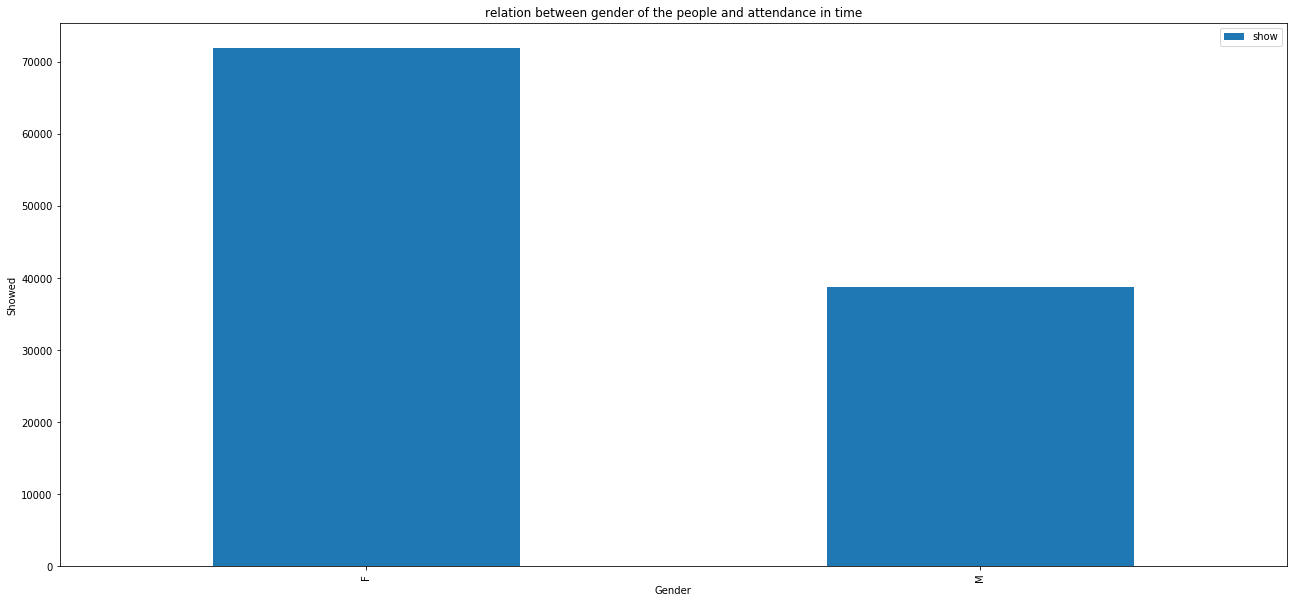

In [23]:
show = (df.No_show == 'No')
df['show']=show
print(df.groupby('Gender')['show'].count())
df.groupby('Gender')['show'].count().plot(kind='bar',figsize=(22,10));
label("Gender","Showed","relation between gender of the people and attendance in time")

relation between gender of the people and attendance in time Female is 71839 and Male is 38687

### Research Question 7 (What is the gender of the people who not showed up at the appointed time?)


Gender
F    71839
M    38687
Name: noshow, dtype: int64


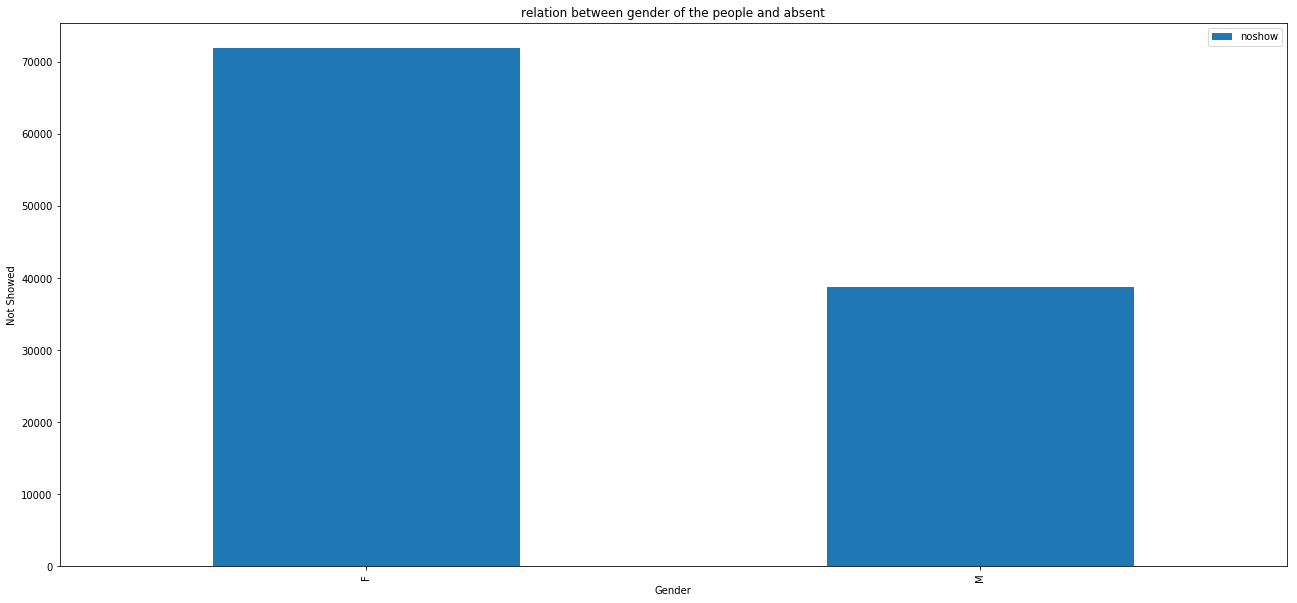

In [24]:
noshow = (df.No_show == 'Yes')
df['noshow']=noshow
print(df.groupby('Gender')['noshow'].count())
df.groupby('Gender')['noshow'].count().plot(kind='bar',figsize=(22,10));
label("Gender","Not Showed","relation between gender of the people and absent")

relation between gender of the people and attendance in time did not affect

### Research Question 8 (What is the day when the largest number of people attended?)


In [25]:
# takes a datetime (AppointmentDay) and extracts the name of weekday
df['DayOfWeek'] = df.AppointmentDay.apply(lambda dt: dt.weekday_name)
#show Most booked day
df.DayOfWeek.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22714
Friday,19019
Thursday,17247
Saturday,39


the most number of appointment in wednesday

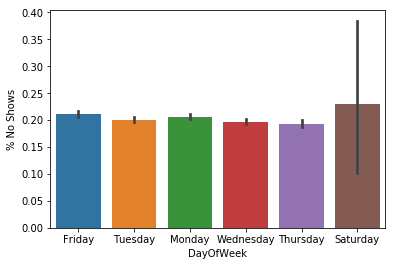

Saturday is the most committed day for people to attend


In [26]:
# show the most committed day for people to attend
show=(df.No_show == 'Yes')
df['show']=show
ax = sns.barplot(x=df.DayOfWeek, y=df.show)
ax.set(ylabel='% No Shows')
plt.show()
print('Saturday is the most committed day for people to attend')

### Research Question 9  (What are The ratio between the SMS_received and the people who attended?)

SMS_received
0    75044
1    35482
Name: show, dtype: int64


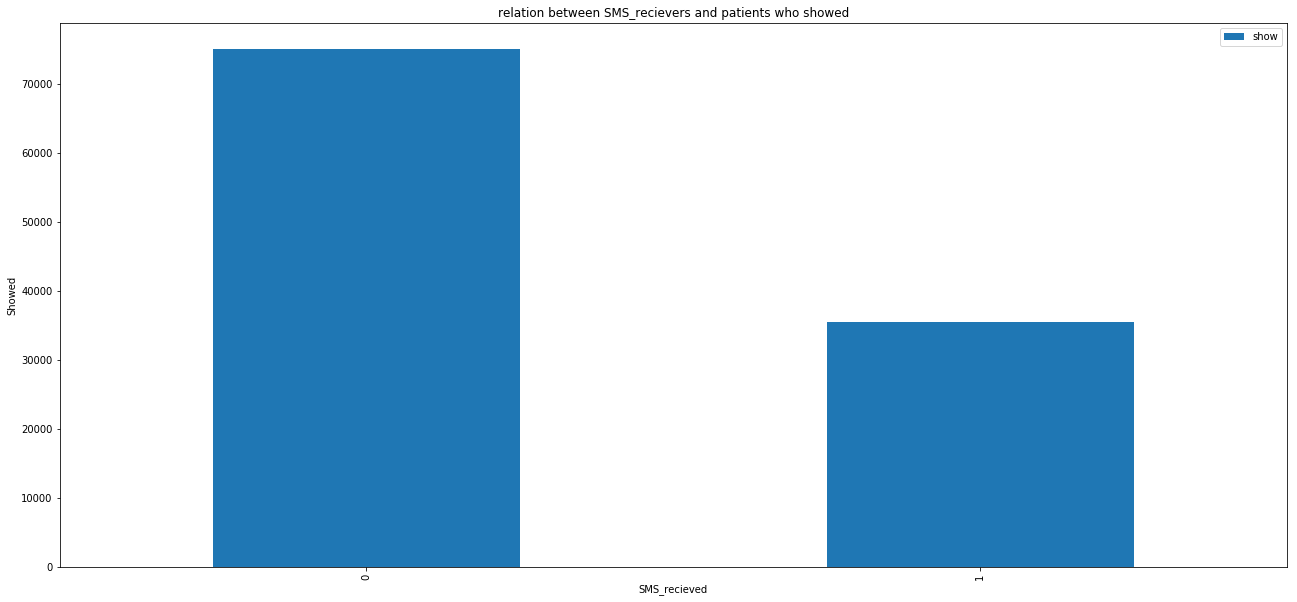

In [27]:
show = (df.No_show == 'No')
df['show']=show
print(df.groupby('SMS_received')['show'].count())
df.groupby('SMS_received')['show'].count().plot(kind='bar',figsize=(22,10));
label("SMS_recieved","Showed","relation between SMS_recievers and patients who showed")

relation between SMS_recievers and patients who showed is 35482

### Research Question 10 (What are The ratio between the SMS_received and the people who absent?)

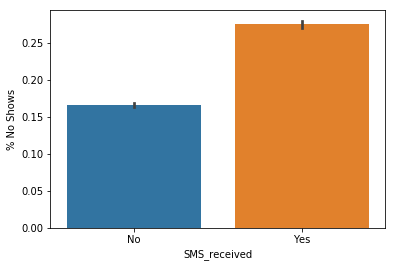

In [28]:
noshow = (df.No_show == 'Yes')
df['noshow']= noshow
yes_no = {1:'Yes', 0:'No'}

# bar plot the percentage of noshows for each sms condition
ax = sns.barplot(x=df.SMS_received.map(yes_no), y=df.noshow)
ax.set_ylabel('% No Shows')
plt.show()


the percentage of noshows for each sms condition more than 0.15

### Research Question 11  (What is the ratio between the neighborhood that achieved the largest attendance rate and the one who did not attend?)


Neighbourhood affects the patient is presence and absence


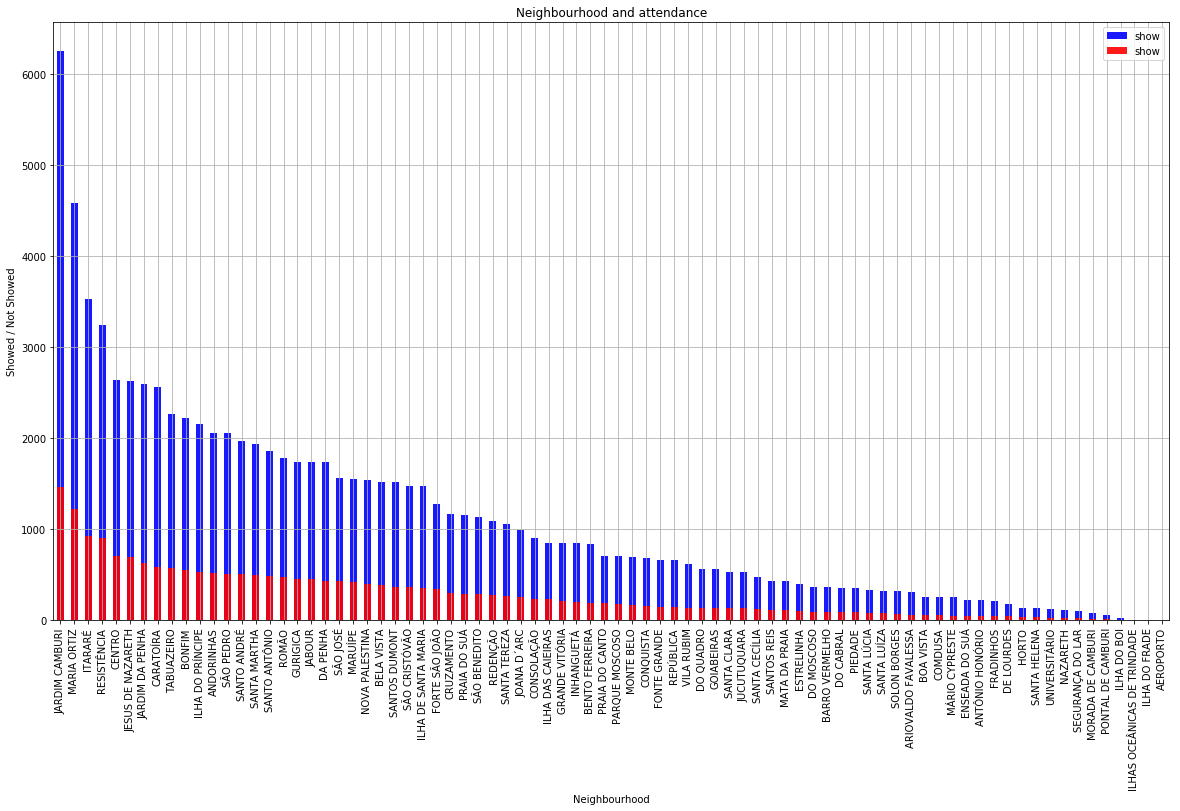

In [29]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df['show']=show
df['noshow']=noshow
df.Neighbourhood[show].value_counts().plot(color='blue',kind='bar',alpha= 0.9, figsize=(20, 11), label='show')
df.Neighbourhood[noshow].value_counts().plot(color='red',kind='bar', alpha= 0.9, figsize=(20, 11), label='show')
plt.xlabel ("Neighbourhood", fontsize=10) ;
plt.ylabel ("Showed / Not Showed", fontsize=10) ;
plt.grid (True)
print('Neighbourhood affects the patient is presence and absence')
label("Neighbourhood","Showed / Not Showed","Neighbourhood and attendance")

Neighbourhood affects the patient is presence and absence

<a id='Limitations'></a>
## Limitations
Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not.
there we some illogical data such as patients with age 0 or less

<a id='conclusions'></a>
## Conclusions

Most of those interested in attending are less than 20 years old and the least people are 80 and over, Age is the most important factor that decided if a patient would come or not 
the average of age for people who will be most likely to show up is 37.790504154999034 , and the average age for people who are not likely to show up is 34.31766656212196.

Gender does not affect attendance, it is not relevant

It is clear that attention must be paid to the messages sent to patients to set the appointment, confirm and follow up
The count of those who received a message to those who did not receive it is 35482 and 75044

The presence or absence of the disease does not affect the presence or absence of the patient

Neighbourhood affects the patient's presence and absence




In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0